   Row        Day  Day.Of.Week        Date  Page.Loads  Unique.Visits  \
0    1     Sunday            1  2014-09-14        2146           1582   
1    2     Monday            2  2014-09-15        3621           2528   
2    3    Tuesday            3  2014-09-16        3698           2630   
3    4  Wednesday            4  2014-09-17        3667           2614   
4    5   Thursday            5  2014-09-18        3316           2366   

   First.Time.Visits  Returning.Visits  
0               1430               152  
1               2297               231  
2               2352               278  
3               2327               287  
4               2130               236  
Row                  0
Day                  0
Day.Of.Week          0
Date                 0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64
               Row  Day.Of.Week   Page.Loads  Unique.Visits  \
count  2167.000000  2167.000000  2167.000000    2167.00

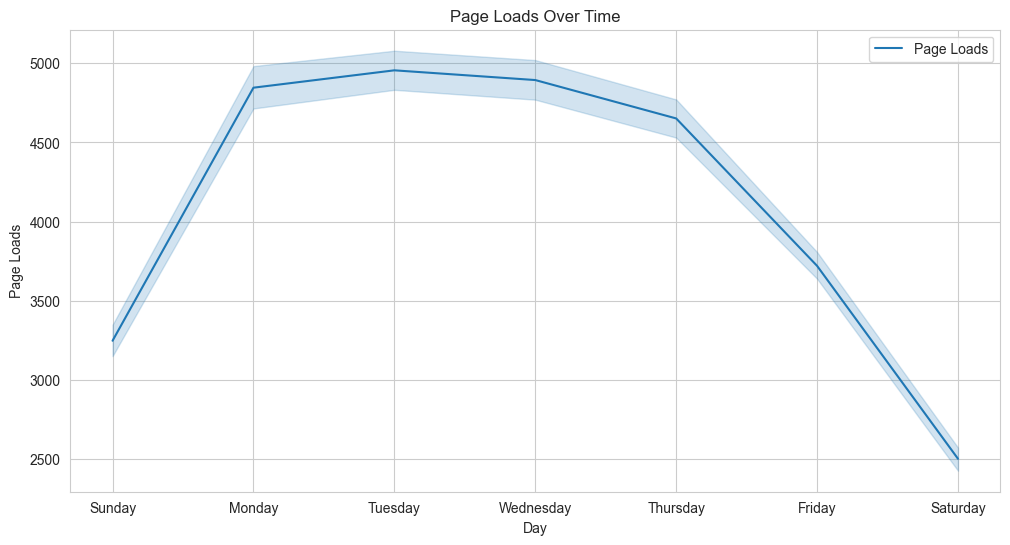

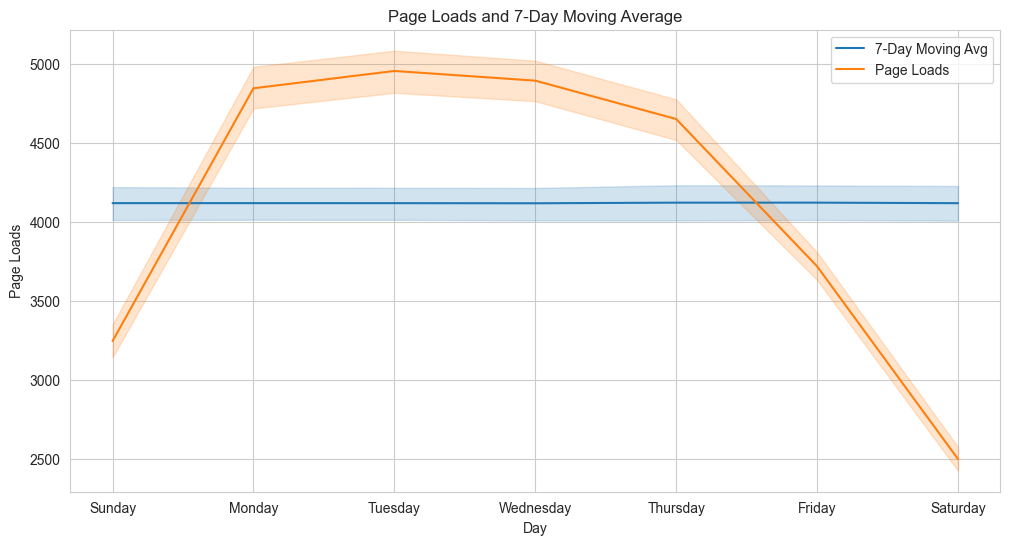

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn

# Load the dataset
df = pd.read_csv("cleaned_data.csv")

# Set Seaborn style
sns.set_style("whitegrid")

# Data Exploration
print(df.head())
print(df.isnull().sum())
print(df.describe())

# Data Visualization using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Day', y='Page.Loads', label='Page Loads')
plt.title('Page Loads Over Time')
plt.xlabel('Day')
plt.ylabel('Page Loads')
plt.show()

# Time Series Analysis - 7-Day Moving Average
df['7-Day Moving Avg'] = df['Page.Loads'].rolling(window=7).mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Day', y='7-Day Moving Avg', label='7-Day Moving Avg')
sns.lineplot(data=df, x='Day', y='Page.Loads', label='Page Loads')
plt.title('Page Loads and 7-Day Moving Average')
plt.xlabel('Day')
plt.ylabel('Page Loads')
plt.legend()
plt.show()


C:\Users\Elamaran Elango\AppData\Local\Temp\ipykernel_1976\2549321231.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Day.Of.Week', y='Page.Loads', ci=None, palette="Set2")


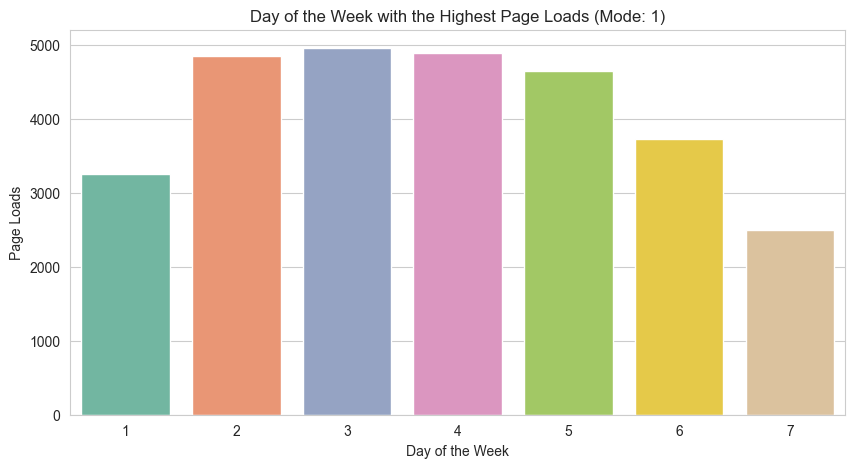

In [4]:


# Bar Plot for Day of the Week with the Highest Page Loads
mode_day_of_week = df['Day.Of.Week'].mode().values[0]
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Day.Of.Week', y='Page.Loads', ci=None, palette="Set2")
plt.title(f'Day of the Week with the Highest Page Loads (Mode: {mode_day_of_week})')
plt.xlabel('Day of the Week')
plt.ylabel('Page Loads')
plt.show()

Mean Squared Error: 1091851.080115375
Root Mean Squared Error: 1044.9167814306434
R-squared: 0.41544763712510513


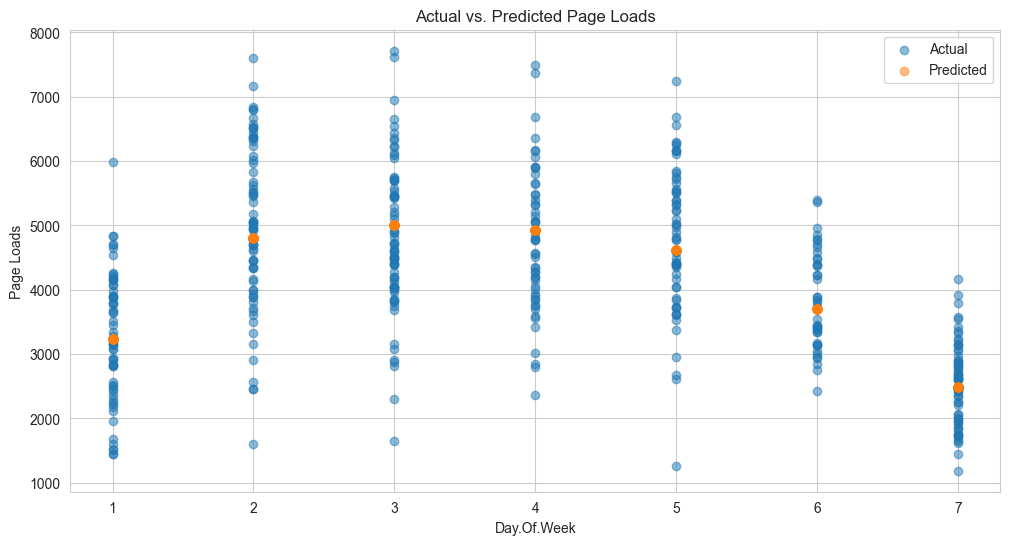

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# Load the dataset
df = pd.read_csv("cleaned_data.csv")

# Set Seaborn style
sns.set_style("whitegrid")

# Data Preprocessing
# Handle missing values if necessary
# Select relevant features
X = df[['Day.Of.Week']]  # Using 'Day.Of.Week' as a categorical feature
y = df['Page.Loads']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Model Training
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Visualization of Actual vs. Predicted
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, label='Actual', alpha=0.5)
plt.scatter(X_test, y_pred, label='Predicted', alpha=0.5)
plt.title('Actual vs. Predicted Page Loads')
plt.xlabel('Day.Of.Week')
plt.ylabel('Page Loads')
plt.legend()
plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# Load the dataset
df = pd.read_csv("cleaned_data.csv")

# Data Preprocessing
# Check for missing values (you can handle them as needed)
# Convert 'Day' to numerical format using one-hot encoding
df = pd.get_dummies(df, columns=['Day'], drop_first=True)

# Feature Engineering
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfMonth'] = df['Date'].dt.day

# Select features and target variable
X = df[['Year', 'Month', 'DayOfMonth', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday']]
y = df['Page.Loads']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Model Training
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 247724.5335532258
Root Mean Squared Error: 497.7193321071885
R-squared: 0.8673738900223302


C:\Users\Elamaran Elango\AppData\Local\Temp\ipykernel_1976\3454774150.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


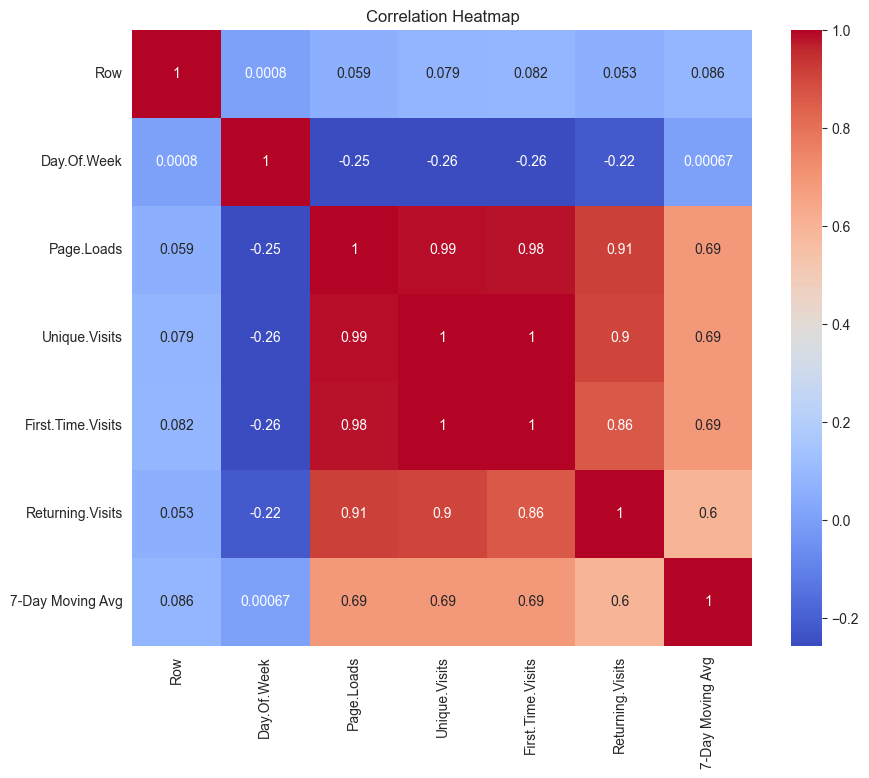

In [5]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()